In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
plt.style.use('fivethirtyeight')

In [2]:
df= pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

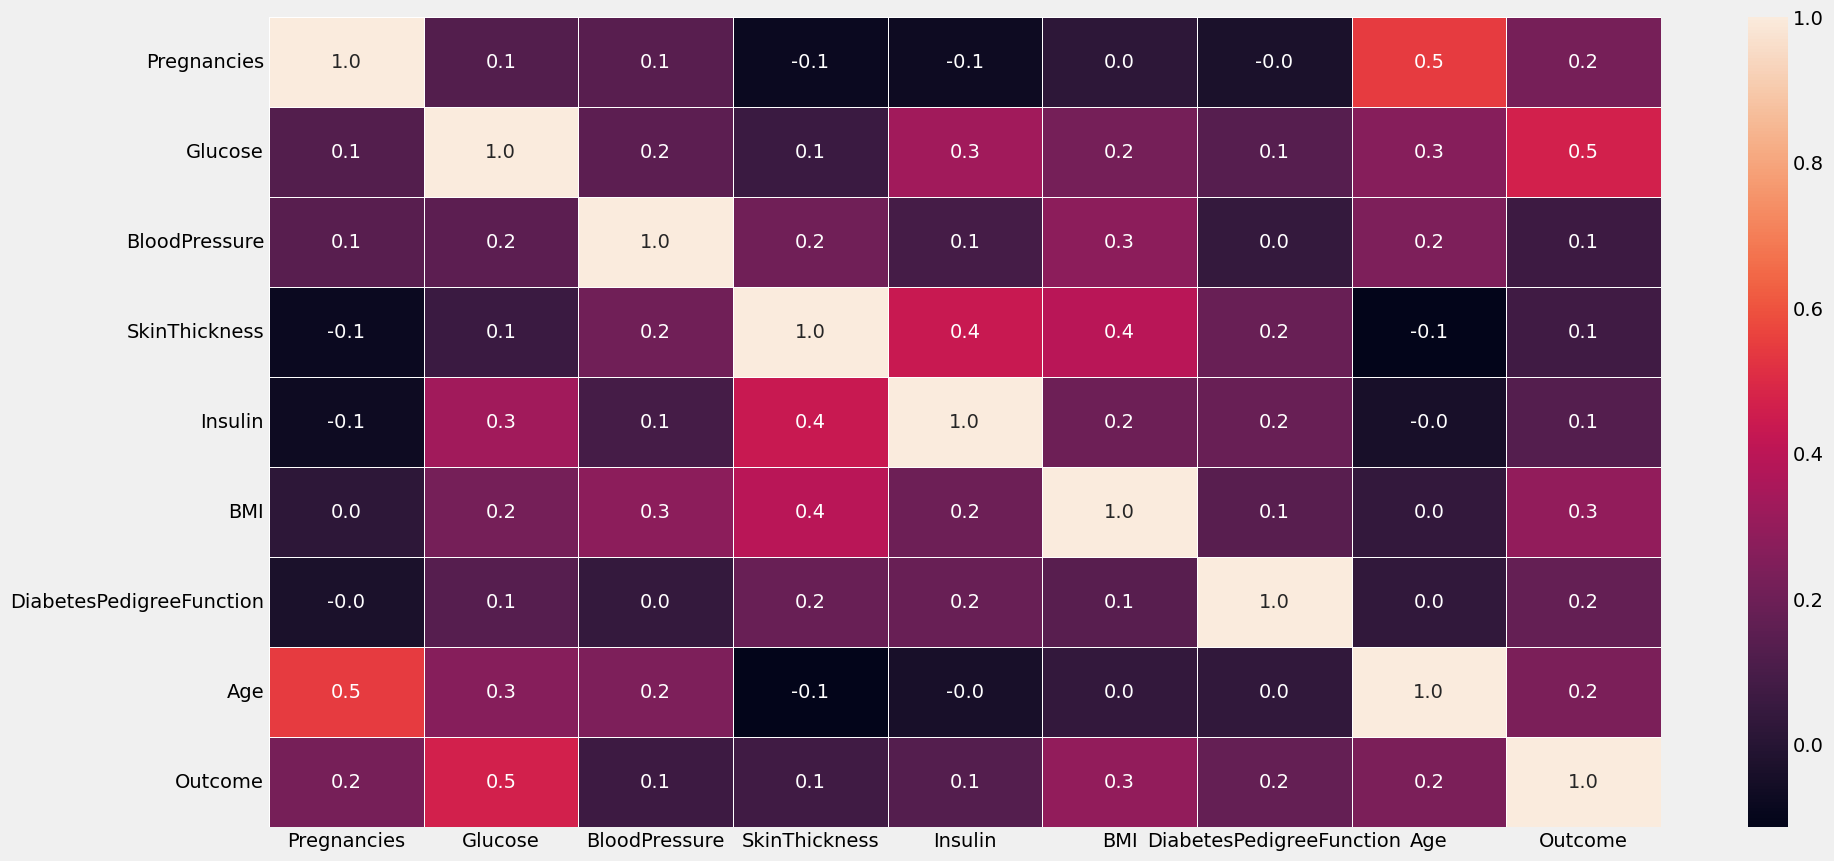

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='0.1f',linewidth=0.7)
plt.show()

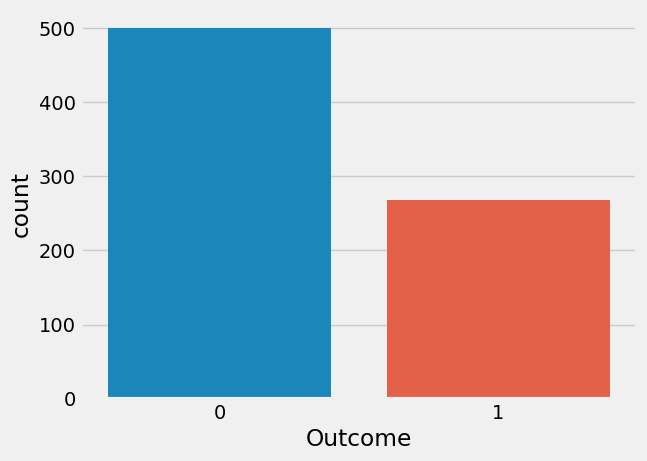

In [9]:
sns.countplot(x='Outcome',data=df)
plt.show()

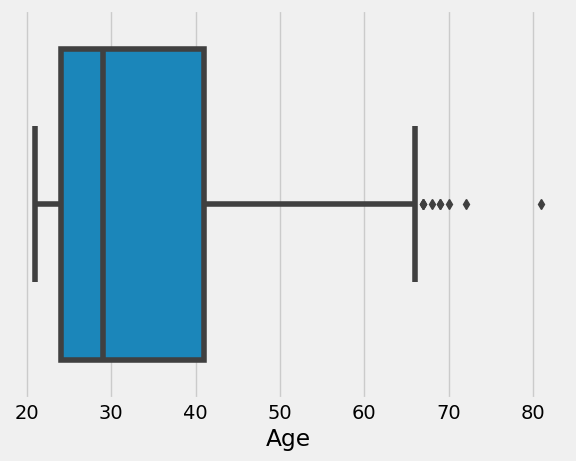

In [10]:
sns.boxplot(x=df['Age'],data=df)
plt.show()

In [11]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [12]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
over_sampler = RandomOverSampler(random_state=0)

# Apply the over-sampling to your data
X_resampled, y_resampled = over_sampler.fit_resample(X, y)


In [14]:
from collections import Counter

# Assuming y and y_resampled are defined elsewhere

# Count the class distribution in the original dataset
print('Old data set:', Counter(y))

# Count the class distribution in the resampled dataset
print('New data set:', Counter(y_resampled))


Old data set: Counter({0: 500, 1: 268})
New data set: Counter({1: 500, 0: 500})


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48,180,32.9,0.171,63,0
764,2.0,122,70,27,0,36.8,0.340,27,0
765,5.0,121,72,23,112,26.2,0.245,30,0
766,1.0,126,60,0,0,30.1,0.349,47,1


In [17]:
maxi=df[df['Outcome']==0]
mini=df[df['Outcome']==1]
maxi.shape ,mini.shape

((500, 9), (268, 9))

In [18]:
model2=SVC()
model3=RandomForestClassifier(n_estimators=1000,class_weight='balanced')
model4=GradientBoostingClassifier(n_estimators=1000)

In [19]:
result1=[]
result2=[]
result3=[]

In [20]:
def call(model) :
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy=accuracy_score(pred,y_test)
    recall=recall_score(pred,y_test)
    f1=f1_score(pred,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    print(model)
    print('accuracy is: ',accuracy,'recall is :',recall,'f1_score is :',f1)

In [21]:
call(model2)

SVC()
accuracy is:  0.7922077922077922 recall is : 0.7272727272727273 f1_score is : 0.5999999999999999


In [22]:
call(model3)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)
accuracy is:  0.8116883116883117 recall is : 0.7045454545454546 f1_score is : 0.6813186813186813


In [23]:
call(model4)

GradientBoostingClassifier(n_estimators=1000)
accuracy is:  0.7662337662337663 recall is : 0.6 f1_score is : 0.6470588235294118


In [24]:
result1

[0.7922077922077922, 0.8116883116883117, 0.7662337662337663]

In [25]:
result2

[0.7272727272727273, 0.7045454545454546, 0.6]

In [26]:
result3

[0.5999999999999999, 0.6813186813186813, 0.6470588235294118]

In [27]:
import pickle

In [28]:
# Save the model using pickle
import os
file_path = 'model.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model3, file)

# Get the absolute path of the saved file
abs_file_path = os.path.abspath(file_path)
print("Absolute path of the saved model file:", abs_file_path)

Absolute path of the saved model file: C:\Users\TREIKA\Desktop\diabetis deployment\model.pkl
